In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [6]:
# Data Loading
url = "https://fetch-hiring.s3.amazonaws.com/machine-learning-engineer/receipt-count-prediction/data_daily.csv"
df = pd.read_csv(url, skiprows = 1, names=['date', 'value'])

In [7]:
# Data Processing
df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda x: x.toordinal())
mean_date = np.mean(df['date_ordinal'])
std_date = np.std(df['date_ordinal'])
df['date_normalized'] = (df['date_ordinal'] - mean_date) / std_date
X = df['date_normalized'].values
y = df['value'].values

In [9]:
# Least Square Linear Regression
n = len(X)
m = (n * np.sum(X*y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - (np.sum(X))**2)
b = (np.sum(y) - m * np.sum(X)) / n

In [10]:
# MSE
y_pred_all = m * X + b
mse = np.mean((y - y_pred_all)**2)
mse

47042482785.37288

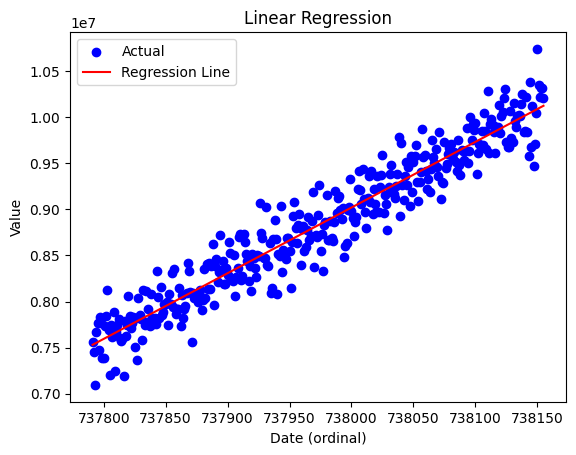

In [11]:
# Regression Plot
plt.scatter(df['date_ordinal'], y, color='blue', label='Actual')

plt.plot(df['date_ordinal'], y_pred_all, color='red', label='Regression Line')

plt.xlabel('Date (ordinal)')
plt.ylabel('Value')
plt.title('Linear Regression')
plt.legend()

plt.show()

In [12]:
# Prediction
new_date = pd.to_datetime("2022-01-01").toordinal()
new_date_normalized = (new_date - mean_date) / std_date
y_pred = m * new_date_normalized + b

y_pred

10129538.498509709

In [14]:
# Export Weights
weights = {
        'm': m,
        'b': b,
        'mean_date': mean_date,
        'std_date': std_date
    }

with open('receipt_pred.json', 'w') as f:
    json.dump(weights, f)
with open('./app/receipt_pred.json', 'w') as f:
    json.dump(weights, f)